In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#đường dẫn vào tệp dữ liệu 
os.listdir('/content/drive/MyDrive/Training/Training')[0:10]

['Tao',
 'Ca_chua',
 'Chuoi',
 'Bap',
 'Hanh',
 'Dua_hau',
 'Chanh',
 'Le',
 'Khoai_tay',
 'Thanh_long']

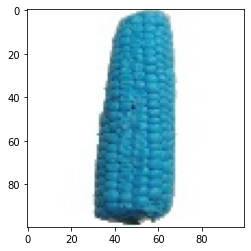

In [ ]:
#Chọn 1 hình trong tập dữ liệu 
path = '/content/drive/MyDrive/Training/Training/Bap/0_100.jpg'
#xử lý ảnh 
im = cv2.imread(path)
#hiển thị
plt.imshow(im)
plt.savefig('a.png')




In [ ]:
#chuyển sang dạng mảng 
grayim = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
grayim

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
#Giảm chiều dữ liệu đưa về 0 và 1
grayim = grayim.astype('float')/255


In [ ]:
#Kéo dãn 
grayim = grayim.flatten()
#Đưa về dạng chuỗi 
grayim = pd.Series(grayim)
grayim

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Length: 10000, dtype: float64

In [ ]:
path = '/content/drive/MyDrive/Training/Training/'
# 
cols = np.arange(grayim.shape[0])
# 
df = pd.DataFrame(columns = cols)
labelcol = []

fruitlist = os.listdir(path)
x = 0

for folder in fruitlist[0:9] : 
  #Gán đường dẫn cho folder
    fruitpath = os.path.join(path,folder)
  #Gán imagelist bằng đường dẫn
    imagelist = os.listdir(fruitpath)
    
    for imag in imagelist:
 #Gán đường dẫn cho ảnh
        imagepath = os.path.join(fruitpath,imag)
    #Đọc ảnh
        image = cv2.imread(imagepath)
    #Tách hệ màu
        b,g,r = cv2.split(image)
    #Gộp màu theo thứ tự RGB
        image = cv2.merge([r,g,b])
    #Chuyển sang màu xám
        imagegray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    #Giảm chiều dữ liệu đưa về dạng 0;1 
        imagegray = imagegray.astype('float')/255
    #Kéo dãn 
        imagegray = imagegray.flatten()
    
        df.loc[x] = imagegray
    
        x = df.shape[0] + 1
        #Bổ sung dữ liệu vào chỗ trống cuối danh sách dưới dạng 0;1
        labelcol.append(folder)
    

In [ ]:
#Gắn nhãn dữ liệu
df['label'] = labelcol
#Chuẩn hóa dữ liệu
df['label'].value_counts(normalize = True)

Ca_chua      0.219477
Chuoi        0.169522
Hanh         0.159243
Le           0.115419
Chanh        0.088368
Dua_hau      0.085663
Khoai_tay    0.081154
Bap          0.081154
Name: label, dtype: float64

In [ ]:
df = shuffle(df).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Chuoi
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,0.996078,0.992157,0.992157,0.992157,0.996078,1.000000,1.000000,0.988235,1.000000,1.000000,0.992157,0.992157,0.996078,0.992157,0.992157,0.992157,0.992157,0.992157,1.000000,...,0.215686,0.392157,0.364706,0.619608,0.972549,0.984314,0.988235,0.992157,0.996078,0.996078,1.000000,0.996078,0.996078,0.984314,0.996078,1.0,1.000000,0.984314,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Ca_chua
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,0.996078,0.996078,0.996078,0.992157,0.996078,0.992157,1.000000,0.996078,0.996078,1.000000,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.988235,0.992157,0.988235,0.992157,0.992157,0.988235,0.996078,0.996078,0.996078,0.996078,1.0,1.000000,0.996078,1.000000,0.996078,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Ca_chua
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,1.000000,...,0.992157,0.996078,0.992157,0.992157,0.988235,1.000000,1.000000,1.000000,0.988235,0.988235,0.996078,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Le
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,0.996078,0.996078,1.000000,0.996078,0.996078,0.996078,0.996078,1.000000,0.988235,0.996078,0.996078,0.996078,1.000000,0.992157,0.996078,0.996078,1.000000,1.000000,1.000000,0.992157,0.996078,0.976471,0.643137,...,1.000000,0.988235,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,0.992157,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Chanh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,...,1.000000,0.996078,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Hanh
5541,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,

In [ ]:
# transpose data set and shuffle
#không xài random vì các biến ngẫu nhiên có thể sẽ trùng nhau
#Xáo trộn dữ liệu
df_t = shuffle(df.transpose())
# transpose back to normal
# Đưa về kiểu dữ liệu chuẩn hóa *normal
df = df_t.transpose()

,6605,5479,1057,7724,9375,9936,4341,4985,4955,4272,5378,3581,2851,1682,2126,5349,3745,9381,6640,2626,8793,891,2704,6115,1146,8704,732,6570,6691,4164,9844,5981,4967,8367,2998,4588,8978,2143,7257,8195,...,1071,2721,1327,6710,4342,2416,5698,8059,9388,3686,9319,784,3392,217,4429,3750,1596,931,1428,3643,4643,2747,5461,6630,3325,6409,1418,6411,6103,9486,7940,6228,2650,2471,7852,2127,9342,6922,1766,7089
0,0.996078,0.529412,1,0.658824,1,1,1,0.513725,1,0.996078,0.529412,1,1,1,1,0.996078,1,1,0.494118,1,1,1,0.466667,0.529412,1,1,1,0.458824,0.870588,1,1,0.486275,1,1,1,0.486275,1,1,0.45098,1,...,1,1,1,0.478431,1,1,0.709804,0.560784,1,0.996078,1,1,1,1,1,1,1,1,1,1,1,1,0.490196,0.501961,1,0.490196,1,0.501961,0.556863,1,0.337255,0.505882,1,1,0.360784,1,1,0.478431,1,0.996078
1,0.235294,0.270588,0.278431,0.156863,0.329412,0.960784,0.207843,0.278431,0.227451,0.513725,0.27451,0.298039,0.25098,0.490196,0.203922,0.207843,0.227451,0.352941,0.172549,0.203922,0.996078,0.996078,0.996078,0.164706,0.258824,1,0.341176,0.239216,0.262745,0.270588,0.32549,0.262745,0.262745,0.203922,1,0.282353,0.27451,0.239216,0.203922,0.596078,...,0.345098,0.192157,0.243137,0.168627,0.207843,0.227451,0.505882,0.192157,1,0.294118,0.211765,1,0.486275,1,0.184314,0.231373,1,0.266667,0.227451,0.223529,0.207843,0.239216,0.231373,0.152941,0.196078,0.164706,0.65098,0.164706,0.337255,0.996078,0.156863,0.156863,0.25098,0.329412,0.172549,0.203922,0.14902,0.152941,0.290196,0.262745
2,0.164706,0.223529,0.329412,0.168627,0.984314,0.984314,0.141176,0.231373,0.133333,0.223529,0.211765,0.396078,0.172549,0.564706,0.196078,0.137255,0.14902,1,0.34902,0.160784,0.996078,0.996078,1,0.184314,0.262745,1,0.988235,0.2,0.254902,0.172549,0.984314,0.247059,0.152941,0.14902,1,0.262745,0.278431,0.278431,0.133333,0.996078,...,0.643137,0.156863,0.25098,0.141176,0.141176,0.239216,0.45098,0.145098,1,0.768627,0.254902,0.996078,0.352941,1,0.145098,0.14902,1,0.360784,0.219608,0.164706,0.141176,0.172549,0.133333,0.227451,0.141176,0.14902,0.996078,0.152941,0.168627,1,0.25098,0.223529,0.176471,0.47451,0.137255,0.196078,0.145098,0.176471,0.294118,0.231373
3,1,0.25098,0.521569,0.533333,1,0.533333,0.682353,0.168627,0.611765,0.4,0.231373,0.235294,0.666667,1,0.988235,0.67451,0.670588,1,0.619608,0.54902,1,1,1,0.615686,0.580392,0.996078,0.996078,0.329412,1,0.6,0.141176,0.188235,0.517647,0.207843,1,1,0.980392,0.635294,0.376471,1,...,0.431373,1,1,0.870588,0.67451,0.996078,1,0.329412,1,0.996078,1,1,0.996078,1,0.682353,0.631373,1,1,1,0.67451,0.729412,0.654902,0.513725,0.635294,0.607843,0.976471,1,0.564706,0.996078,0.996078,0.427451,0.631373,0.639216,0.498039,0.396078,0.996078,0.309804,0.6,0.533333,1
4,0.52549,0.360784,0.454902,0.541176,0.321569,1,0.74902,0.262745,0.580392,0.588235,0.286275,0.301961,0.713725,0.996078,0.737255,0.721569,0.737255,1,0.643137,0.784314,1,1,1,0.662745,0.603922,0.996078,0.662745,0.380392,0.188235,0.67451,0.411765,0.231373,0.435294,0.203922,1,0.309804,0.137255,0.682353,0.290196,0.992157,...,0.313725,0.756863,0.745098,0.580392,0.8,0.701961,0.996078,0.258824,1,0.333333,1,1,0.996078,1,0.698039,0.764706,1,0.698039,0.780392,0.658824,0.835294,0.690196,0.572549,0.584314,0.756863,0.588235,0.709804,0.592157,0.823529,0.992157,0.462745,0.737255,0.647059,0.447059,0.376471,0.8,0.466667,0.576471,0.509804,0.219608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,0.631373,0.415686,0.772549,0.262745,0.996078,0.270588,0.643137,0.588235,0.643137,0.545098,0.439216,0.623529,0.752941,0.996078,0.619608,0.592157,0.756863,1,0.462745,0.643137,1,1,1,0.345098,0.752941,1,0.670588,0.321569,0.992157,0.568627,0.2,0.490196,0.490196,0.388235,1,0.670588,1,0.768627,0.4,1,...,0.780392,0.654902,0.666667,0.364706,0.654902,0.588235,1,0.364706,1,0.501961,1,1,0.99607

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# Create X and Y variables
X = df.drop('label',axis = 1)
y = df['label']

# create our test and training set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,stratify = y)

In [ ]:
from sklearn.svm import SVC
#Sử dụng SVM để tiến hành training model
svm_model = SVC().fit(X_train,y_train)
trainscore = svm_model.score(X_train,y_train)
testscore = svm_model.score(X_test,y_test)
#Hàm dự đoán
y_pred = svm_model.predict(X_test)


In [ ]:
print("CLASSIFICATION REPORT FOR SVM")
# print("Confusion MAtrix:")
# print(confusion_matrix(y_test,y_pred))
# print()
# print(classification_report(y_test,y_pred))
print("train score:",trainscore)
print("test_score",testscore)

CLASSIFICATION REPORT FOR SVM
train score: 0.9985569985569985
test_score 0.9971160778658976


In [ ]:
X_test[0]

5196           1
5523           1
2035    0.996078
2851           1
1031           1
          ...   
3286           1
1227           1
1806           1
2916           1
5014           1
Name: 0, Length: 1387, dtype: object